<a href="https://colab.research.google.com/github/nsoukouna3/Data-Structure/blob/main/Day_02/Deep_Learning_And_TensorFlow_SV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

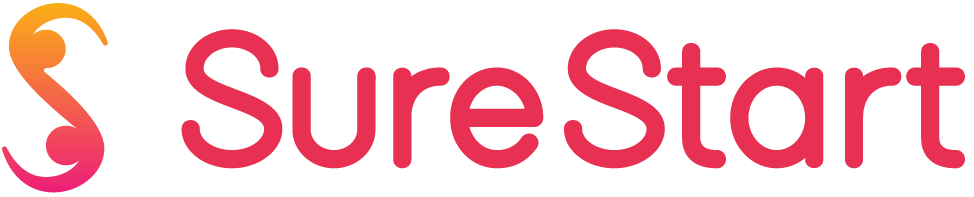

#Day 2 Objectives:
* To familiarize you with the differences between AI, Machine Learning, and Deep Learning. 
* To introduce you to Deep Learning models and algorithms.


**Note**: In case of errors which suggest restarting the runtime, restarting runtime via the button on the comments will solve the error. Or you can also go to *Runtime > Restart Runtime*.

### Google Colabratory 
is a virtual coding environment, within which many useful libraries have already been installed. If we want to install newer or different versions of the ones already installed, there can be version conflicts. But these conflicts may be resolved by restarting the runtime.


In [1]:
# Any python code script to be run in a cell should be written just as so
# And any terminal commands to be run is preceeded by a "!" 

! pip install --upgrade matplotlib 
! pip install --upgrade numpy
! pip install --upgrade mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 12.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 15.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing ins

In [1]:
# Importing libraries as aliases is done in the following manner
# import Library as Lib

# Numpy is used to perform mathematical operations on matrixes
import numpy as np

# Matplotlib is a visualization library  
import matplotlib.pyplot as plt

#Data Creation
Let's start by creating an interesting dataset, referred to as an XOR data.

In [12]:
# data is an array which represents 4 different data clusters
data = []
# target holds information about which class each respective data points are from
target = []

# Here we are just instantiating random points at 4 different places in the graph space
for i in range(2):
    for j in range(2):
        for _ in range(100):
            if (i+j)%2==0:
                data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1) + j])
                target.append([0])
                
            else:  
                data.append([np.random.normal(0, 0.1) + i, np.random.normal(0, 0.1)+ j] )
                target.append([1])



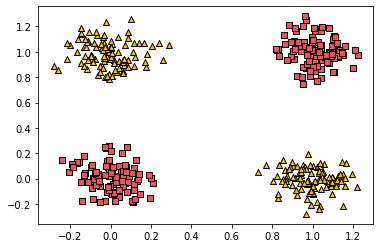

In [13]:
# Visualizing the data; plt.scatter creates a scatter plot

for i in range(len(data)):
    if target[i][0] == 0:
        plt.scatter(data[i][0] ,data[i][1] , c='#F15156', marker = 's', edgecolor = 'black')
    else:
        plt.scatter(data[i][0] ,data[i][1] , c='#FFBD00', marker = '^', edgecolor = 'black')

plt.show()

In [14]:
# Next, we recast the python lists above as np.array because
# NumPy arrays are faster and more compact than python lists.
# Here we prepare two arrays of the data we created for ease of use 
# as a dataset for the machine learning model we will use

data = np.array(data)
print("Shape of the input data", data.shape)

target = np.array(target)
print("Shape of the output data", target.shape)

Shape of the input data (400, 2)
Shape of the output data (400, 1)


# Linear Machine Learning models
Linear models are the simplest of machine learning models that are based on estimating the "line of best fit" through the data that is provided.

Intuitively, this simply means answering the question: is there a line that will best summarize or separate this data?

In [15]:
# Scikit-Learn is a Python library which has higher-level 
# implementations of many machine learning algorithms.
# Scikit-Learn makes it easy to define a machine learning model 
# and then fit it to given data.
from sklearn.linear_model import LinearRegression

## Linear Regression Example

Let's build a linear regression model and "fit" it to the XOR data we defined above.

In the block below, `reg` is our model definition.

(A similar syntax can be used to define other classification or clustering using the sklearn library. You will see it being used below when we explore two other linear models: `perceptron` for classification; and `K-means` for clustering.)

In [16]:
reg = LinearRegression().fit(data, target)
print(reg.score(data, target))
print(reg.coef_)
print(reg.intercept_)

0.0005979057197268434
[[-0.01588276 -0.01793308]]
[0.51687808]


## Question 1

Check out the Linear Regression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) and explain what do `.score()`, `.coef_`, and `.intercept_` in the above cell mean?


### Answer 1


.score is predict how accurant our prediction model is, .coefficient is the number that we multply our data and intrcept is the constant value 
y= ax + b

a= is an slope and can be also the coefficient, b= is intercept 

## Visualization

The code block below will visualize how well the linear regressor can separate the four classes we created.

In a linear regression task, a line is used to separate a plane in two parts. This works very well if the data is linearly separable. See below and note that our data may not be as as easily summarized or separable with a single line --- casting doubt on whether a linear regressor such as a perceptron or a linear regression model may be able to succesfully model a dataset such as this.

Note that sometimes given data may not be separable in the original feature space but there are tricks that can transform the data into another feature spaces, which can be LINEARLY separable.



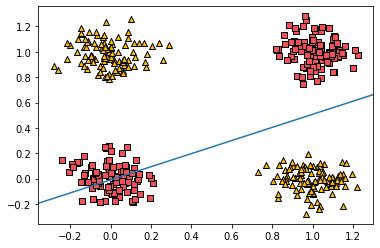

In [17]:
for i in range(len(data)):  
    plt.scatter(data[i][0], data[i][1], c=['#F15156', '#FFBD00'][target[i][0]], edgecolors='black', marker=['s', '^'][target[i][0]])

# The plot makes it obvious 
# that this method does not classify the dataset properly into its classes
# Before we expound on it, lets look at the perceptron, 
# or as we can also say, the earliest neural unit made    

plt.axline(reg.coef_[0], slope = reg.intercept_)

#Fun Fact
In the United States, there are about 350 spoken languages. But programming languages has us beat with over 700 coding languages in use today! Only two countries have more languages, Papua New Guinea (836) and Indonesia (710).

Some programming languages, like Java, Python, and HTML, are more common, but others, like Rust and Kotlin, are used in very specific situations. The good news for programmers? Once you learn the big ones, the more niche languages come easily.

There exist esoteric programming languages which do not serve any specific purpose always, for example LOLCODE, Chef, Piet and Whitespace. An esoteric programming language is a programming language designed to test the boundaries of computer programming language design, as a proof of concept, as software art, as a hacking interface to another (procedural or functional) programming language, or as a joke. Such languages are often popular among hackers and hobbyists.

#Tensorflow for Neural Network Modeling

As usual, let's begin by importing the needed libraries: First,`TensorFlow`: it is an open source machine learning library for Python by Google. 

We also import `mlxtend`, a library used for various data science purposes. Here we have used it to visualize the learned boundaries of our neural network algorithm.

In [18]:
import tensorflow as tf
from mlxtend.plotting import plot_decision_regions

We are using version 2.0 of Tensorflow. As of TensorFlow 2.0, Keras, which was a "wrapper" --- or abstraction layer creating ease of function use --- over TensorFlow 1.0, is fully incorporated in TensorFlow 2.0. 

#Introduction to TensorFlow

TensorFlow is a open source python library made towards building, training and deploying deep neural networks. TensorFlow has a toolkit for visualizing its neural networks called TensorBoard.

TensorFlow 1.0.0 is Google's end-to-end open source platform for machine learning. There are versions of TensorFlow in JavaScript as well called Tensorflow.js. It is availabe on Linux, MacOS and Windows. Google released TensorFlow Lite specifically for mobile application development.

We will use TensorFlow 2.6, which incorporates various third party libraries within TensorFlow itself. The Keras wrapper for TensorFlow is now a TensorFlow module. There are cross compatibilities to code written in TensorFlow 1.0.

What follows can be considered to be a gentle introduction to TensorFlow for the purposes of this program.

Following this primer, for further learning, check out the following offering by Google: https://developers.google.com/machine-learning/crash-course/first-steps-with-tensorflow/toolkit

#What are tensors?

Tensors are multi-dimensional arrays with a uniform type (called a `dtype`). You can see all supported dtypes at `tf.dtypes.DType`.

 Tensors are like `numpy.ndarray`, which has a data type and a shape.
 
Native Python types are automatically converted to tensors by Tensorflow.

In the codeblock below, we demonstrate various Tensorflow functions. Besides those, Tensorflow functions also include: 
* `subtract(x, y, name=None)`	Subtracts two tensors
* `divide(x, y, name=None)`	Divides the elements of two tensors
* `add_n(inputs, name=None)`	Adds multiple tensors
* `mod(x, y, name=None)`	Performs the modulo operation
* `abs(x, name=None)`	Computes the absolute value
* `negative(x, name=None)`	Negates the tensor’s elements
* `sign(x, name=None)`	Extracts the signs of the tensor’s element

There are many other mathematical functions you can check out at: https://www.tensorflow.org/api_docs/python/tf/math




In [19]:
# You can create a tensor as follows
print("Tensor:", tf.constant([4, 5, 6]))

# When two whole numbers are given to a Tensorflow function, it produces a tensor with the solution 
print("Scalar Addition:", tf.add(1, 2))

# A list given to the same function creates a tensor, treating the two lists as matrices
print("Matrix Addition:", tf.add([1, 2], [3, 4]))

# All basic mathematical functions still work as would be expected, just with tensor outputs
print("Squaring:", tf.square(5))

# The tf.reduce_sum() function reduces the dimensionality of a list given to it and sums all the elements
print("Dimension-wise Addition:", tf.reduce_sum([1, 2, 3]))

# We can treat tensors as other forms of arrays or numbers within python functions
print("+ Operator Overriding:", tf.square(2) + tf.square(3))

Tensor: tf.Tensor([4 5 6], shape=(3,), dtype=int32)
Scalar Addition: tf.Tensor(3, shape=(), dtype=int32)
Matrix Addition: tf.Tensor([4 6], shape=(2,), dtype=int32)
Squaring: tf.Tensor(25, shape=(), dtype=int32)
Dimension-wise Addition: tf.Tensor(6, shape=(), dtype=int32)
+ Operator Overriding: tf.Tensor(13, shape=(), dtype=int32)




A key function of Keras is the `models.Sequential()` function. You will use this function many times over the next several weeks. This function allows you to create neural network models layer-by-layer. 

Once you have instantiated a model using the `models.Sequential()` function, you can add each layer using `tf.kreas.models.add(tensor.shape)` in order to add a layer to the neural network.

For clarity and ease of reading, you can do the above two steps of model instantiation and layer definition as separate lines of code.  Or, you can instantiate the model and define the model layers in a single line of code.
```
tf.keras.models.Sequential(tf.keras.Input(shape),
                           tf.keras.layers.Dense(shape,activation),
                           tf.keras.layers.Dense(1,activation))
```

The two code blocks below builds and complies a simple model. Carefully read through each line of code and the accompanying comments to understand what is happening at each step. 

In [92]:
model = tf.keras.models.Sequential()
# we have chosen layers which gradually thin down to one output 
# as we want to find out if the data sample is in one class or other
# in other words our task is binary classification

model.add(tf.keras.Input(shape=(2))) #shape indicates how many dimensions
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_222 (Dense)           (None, 100)               300       
                                                                 
 dense_223 (Dense)           (None, 50)                5050      
                                                                 
 dense_224 (Dense)           (None, 1)                 51        
                                                                 
Total params: 5,401
Trainable params: 5,401
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.compile(
    # Indicate the optimizer to use:
    # Optimizers are algorithms which minimize or maximize a mathematical expression
    # In this case the loss function
    # Other optimizers you can use are: Adam, SGD, Adagrad
    optimizer=tf.keras.optimizers.RMSprop(),  

    # Indicate the loss function to minimize:
    # A loss function at the most basic level evaluates how badly a neural network performed
    # i.e zero loss means perfect prediction 
    # The loss generated from a loss function is used by the optimizer 
    # to change the weights of a neuron to get better accuracy
    # We use Binary Cross Entropy as we want to classify between two classes
    loss=tf.keras.losses.BinaryCrossentropy(),
    
    # List of metrics to monitor:
    # Metrics are a measure of performance of a neural network accuracy of classification
    # based on how well a model performs by predicting properly 
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)
print(data.shape)
# tf.keras.models.fit() is a function that handles training a neural network 
# training based on the hyperparameters defined in the network layers
# and in the optimizer, loss function and metrics defined
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

(400, 2)
Epoch 1/5
1/1 [==============================] - 1s 802ms/step - loss: 0.5816 - binary_accuracy: 0.9125
Epoch 2/5
1/1 [==============================] - 0s 22ms/step - loss: 0.5404 - binary_accuracy: 0.9925
Epoch 3/5
1/1 [==============================] - 0s 29ms/step - loss: 0.5021 - binary_accuracy: 0.6450
Epoch 4/5
1/1 [==============================] - 0s 21ms/step - loss: 0.4297 - binary_accuracy: 0.9950
Epoch 5/5
1/1 [==============================] - 0s 23ms/step - loss: 0.3627 - binary_accuracy: 0.9325


## Question 2
Compare the model in the code block below to the original deep model in the code block above. In the model below, we have added in 1 more layer and more nodes to the first 3 layers. And then we train the model for the same perieod as above, i.e., 5 epochs. ("Epoch" defines the number times that the learning algorithm will work through the entire training dataset.) 

Now consider **the loss** produced at each epoch during training the model above and the new model below. (Loss indicates the difference between model prediction and truth. Lower loss = better prediction). 

What is the effect of adding more layers and adding more nodes on the loss? Is the new model is likely to be more accurate than the original one above? 


In [93]:
# Define and instantiate model layers
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2)))
#model.add(tf.keras.layers.Dense(250, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.summary()

# Define optimizers, loss function and metrics

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

Model: "sequential_55"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_225 (Dense)           (None, 200)               600       
                                                                 
 dense_226 (Dense)           (None, 150)               30150     
                                                                 
 dense_227 (Dense)           (None, 100)               15100     
                                                                 
 dense_228 (Dense)           (None, 50)                5050      
                                                                 
 dense_229 (Dense)           (None, 1)                 51        
                                                                 
Total params: 50,951
Trainable params: 50,951
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Fit model 
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

Epoch 1/5
1/1 [==============================] - 0s 24ms/step - loss: 0.5879 - binary_accuracy: 0.9700
Epoch 2/5
1/1 [==============================] - 0s 21ms/step - loss: 0.5633 - binary_accuracy: 0.9850
Epoch 3/5
1/1 [==============================] - 0s 31ms/step - loss: 0.5372 - binary_accuracy: 0.9700
Epoch 4/5
1/1 [==============================] - 0s 27ms/step - loss: 0.5089 - binary_accuracy: 0.9875
Epoch 5/5
1/1 [==============================] - 0s 30ms/step - loss: 0.4799 - binary_accuracy: 0.9750


3888/3888 [==============================] - 8s 2ms/step


<AxesSubplot: >

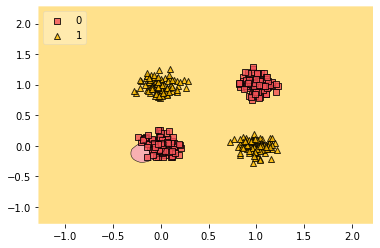

In [24]:
# Visualize learned boundaries
plot_decision_regions(data, target.reshape(-1), clf=model, legend=2, colors = '#F15156,#FFBD00')

### Answer 2


Yes the model will be more predict better. As we increase the number of the layers the number of losses will decrease the losses and we will we get more accurancy. Adding more layers will make our model better predict.

## Question 3

If the answer to *Question 2* is *yes*, why do you think the new model is performing better than the original model? 

In the codeblock below, try adding one layer at a time and observe the effect of adding new layers. What do you think is the most number of layers, you can add to this model, to make it more accurate? 


In [96]:
""" Try out your code for Question 3 here """

# Define and instantiate model layers
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2)))

#try ADDING MORE LAYERS below and changing the number of nodes
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(300, activation ='relu'))


#add the classification layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

# Define optimizers, loss function and metrics

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),  
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

# Fit model 
model.fit(data, target, epochs = 5, batch_size=data.shape[0])

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_243 (Dense)           (None, 200)               600       
                                                                 
 dense_244 (Dense)           (None, 150)               30150     
                                                                 
 dense_245 (Dense)           (None, 200)               30200     
                                                                 
 dense_246 (Dense)           (None, 100)               20100     
                                                                 
 dense_247 (Dense)           (None, 1)                 101       
                                                                 
Total params: 81,151
Trainable params: 81,151
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 

### Answer 3

It's perform better than original model because we have increase number of layers. Adding 5 five layers to this model is enough to make this model more accurant.

## Question 4

Remember that this task, our goal was to separate the data into two classes (one class of yellow triangles and oen class of red squares.) 

Now look at the last layer of the model you build: `model.add(tf.keras.layers.Dense(1, activation='sigmoid'))`. 

It is the classification layer. Here we are are using a [`sigmoid` activation function](https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6), and 1 output node. 

A sigmoid output is a probability. Since probability of anything exists only in the range of 0 and 1, sigmoid is the right choice for our dataset which only has two output targets (0 or 1). A threshold (or cutoff probability) defined by the model learns what probability it is being either class. 

Now consider another activation function `softmax`. It is a more generalized logistic activation function which is used for multi-class classification.

Now, try something in the code block above. Instead of `sigmoid`, if we were to replace it with `softmax`, what change would we need to make to number of neurons?

Do we need to use softmax for this problem or is sigmoid sufficient? Why?


### Answer 4


\<*Type your answer here*\>

In [113]:
from tensorflow.python.ops.gen_nn_ops import softmax
model= tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(2)))

model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(5, activation='relu'))
model.add(tf.keras.layers.Dense(15, activation= 'relu'))

model.add(tf.keras.layers.Dense(1, activation='softmax'))

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(),
    loss=tf.keras.losses.BinaryFocalCrossentropy(),
    metrics=[tf.keras.metrics.BinaryAccuracy()] )

model.fit(data, target, epochs=5, batch_size=data.shape[0])

Model: "sequential_74"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_308 (Dense)           (None, 10)                30        
                                                                 
 dense_309 (Dense)           (None, 5)                 55        
                                                                 
 dense_310 (Dense)           (None, 15)                90        
                                                                 
 dense_311 (Dense)           (None, 1)                 16        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1/1 [==============================] - 3s 3s/step - loss: 0.3512 - binary_accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 0.3474 - binary_

Using the softmax function instead of sigmoid function we should decrease the number of neurons. But for the probelm above sigmoid function is enough since the problem  is binaryclassification method which require two output classes.

#Loading Datasets and Preprocessing the Data
The MNIST dataset — often used as the "Hello, World" of machine learning programs for computer vision — contains images of handwritten digits (0, 1, 2, etc.). A drop-in replacement for this classic MNIST dataset is Fashion MNIST, which is a dataset of images of articles of clothing. 

We use Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Tensorflow has these datasets inbuilt in it. You would call the classic numbers MNIST dataset as `tf.keras.datasets.mnist` and the fashion MNIST dataset as `tf.keras.datasets.fashion_mnist`.

In [114]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [125]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [126]:
# Separating data into train and test samples is one of the first steps of model development

# We see the shape of this dataset, 60,000 images of 28x28 pixels
print("Shape of train samples:", train_images.shape)

# Each sample is within the range of 0 to 9
print("Range of train and test samples:", train_labels)

# There are 10,000 images, again of 28x28 pixels
print("Shape of test samples:" , test_images.shape)

# A common split of train to test samples is 80/20 but here the train:test ratio is 6:1  

Shape of train samples: (60000, 28, 28)
Range of train and test samples: [9 0 0 ... 3 0 5]
Shape of test samples: (10000, 28, 28)


The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255.

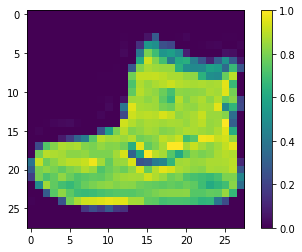

In [128]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way.

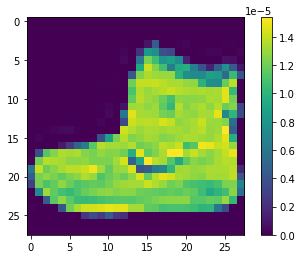

In [130]:
train_images = train_images / 255.0

test_images = test_images / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Question 5

Internet research time! Do some web search and answer these two questions: 

1) Why do we scale these values to a range between 0 and 1? 

2) What would happen if we just directly fed these values to the neural network?


### Answer 5

1) Scaling train image and test image between 0 and 1 the computation becomes easier and faster and time require to process the the pixels is reduce.

2) By just direclty fed these value to the neural network will require a lot of computation since the pixel value will range between zero 0 to 255 which is larger number than range between 0 and 1.

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

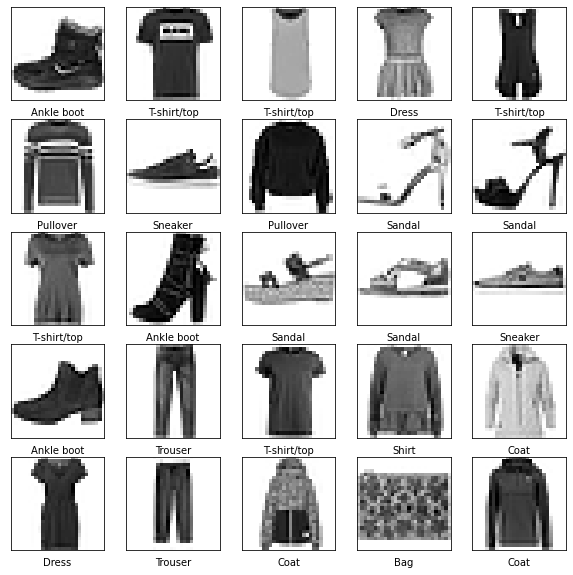

In [131]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Fun fact 

Did you know about the Japanese confectionery shop that employed a machine learning scientist to automate sorting and billing of their 100s of types of pastries?  And later that same model was used to succesfully find cancer symptoms in patients tissue, as apparently that tissue under an MRI looks like pastries. Read about it in this [New Yorker article](https://www.newyorker.com/tech/annals-of-technology/the-pastry-ai-that-learned-to-fight-cancer).


#Build a simple (fairly shallow) neural network learning model

The first layer in the network below is `tf.keras.layers.Flatten`. It transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up into a single row. This layer has no parameters to learn; it only reformats the data.

The second layer of this model is a `tf.keras.layers.Dense` layer, which is a fully connected feed forward layer, that is often used for changing the dimensions of the feature vectors or to apply various operations to the latter.

The third layer is also a `tf.keras.layers.Dense` layer with 10 nodes,  corresponding to one of each classes. 

In [134]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

Let's briefly talk about optimizers and loss functions. 

There is a concept of momentum in machine learning along with gradient descent that accumulates the gradient of the past steps to determine where to go in the potential space of the loss function, instead of only using current gradient to select where to go in that space.

With `RMSprop` (Root mean squared propogation) optimizer, that momentum reaches much higher values before it changes any direction. `RMSprop` is more often used with recurrent neural networks.

While `Adam` (derived from "adaptive moment estimation") is slower to change its direction, and then much slower to get back to the minimum. `Adam` can handle sparse datasets for noisy problems, which often suits image estimation problems well. 



In [136]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#Train and Evaluate Model

Irrespective of the input type, the process and functions for training a TensorFlow model is fairly similar for most types of classification models.

In [137]:
model.fit(  train_images, train_labels, epochs=30)

Epoch 1/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0984
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 3/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0995
Epoch 4/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0978
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0992
Epoch 6/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0979
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0980
Epoch 8/30
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3028 - accuracy: 0.0997
Epoch 9/30
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0975
Epoch 10/30
1875/1875 [==============================] - 8s 4ms/step - loss: 2.302

#Model evaluation
Once the model has been trained, we evaluate how well the model performs on the test set (sometimes called the held-out set). See the Tensorflow function call for performing this evaluation.

In [138]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 2.3026 - accuracy: 0.1000 - 750ms/epoch - 2ms/step

Test accuracy: 0.10000000149011612


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents **overfitting**. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. 

#Making predictions using the trained model

`tf.keras.layers.Dense` outputs values of a neuron getting fired up, and all those neurons map a certain input to a certain class. These values are called **logits**. Logits on their own are not bounded (as in don't have a range) and are less interpreteable (as to what the output value indicates).

We normalize the output of the last `tf.keras.layers.Dense` layer to the bounds of $[0, 1]$ using the `softmax` function. Softmax converts logits into **probabilities** for each class, such that when we add all the outputs the result is always 1. We will learn more about Softmax on Day 10.

In [139]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [140]:
#tf.predict predicts the label of each of the images in the test set.
predictions = probability_model.predict(test_images)
#For each image, the output is an array of 10 numbers. 
# They represent the model's "confidence"
# that the image corresponds to each of the 10 different articles of clothing. 
# Let's look at the predictions of the zero-th image
print(predictions[0],"\n")

313/313 [==============================] - 1s 3ms/step
[0.09972228 0.10112017 0.09878054 0.10044304 0.09907095 0.10015751
 0.09990932 0.0996762  0.10185579 0.0992642 ] 



In [141]:
# Let's look at which is the most likely label (aka, the prediction):
# That is estimated by finding the position of the maximum confidence score 
# In the statement below, let's specifically look at what is predictedd for the zero-th image
print(np.argmax(predictions[0]),"\n")
#Now let's look at which is the true label of the zero-th image
print(test_labels[0],"\n")
#if they match, the prediction was correct!

8 

9 



# Verifying predictions

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

In [143]:
# Code to visualize results
# go through each line of code and try to understand what it is doing

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

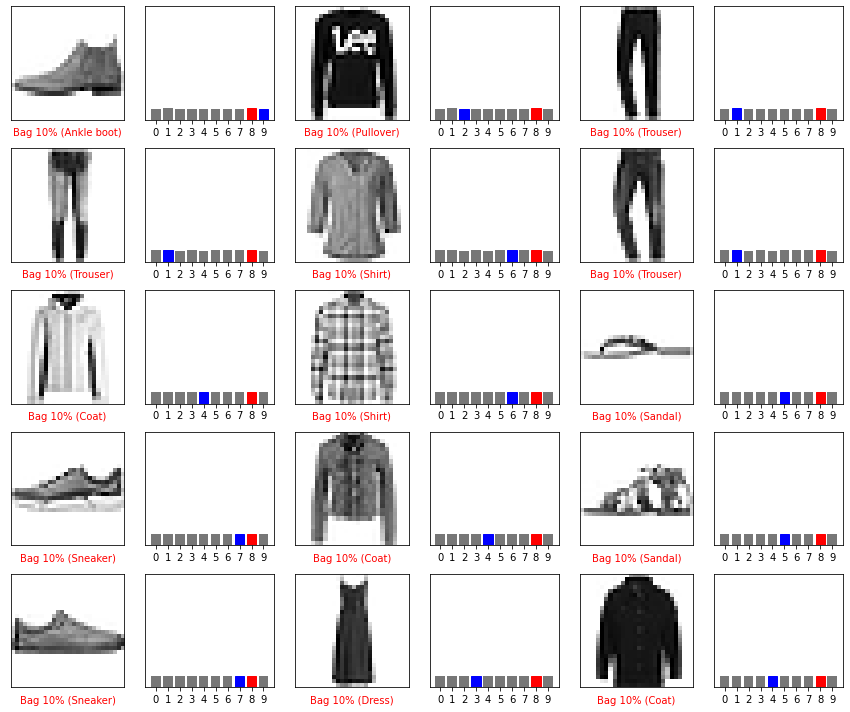

In [144]:
# Plot the first X (in our case, we did 5 X 3) test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)

  #review the plot_image function above
  plot_image(i, predictions[i], test_labels, test_images)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)

  #review the plot_value_array function above
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

#Use the Trained model

This next codeblock contains code for making individual predictions.

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 26ms/step
[[0.09972229 0.10112017 0.09878055 0.10044305 0.09907096 0.10015751
  0.09990933 0.09967621 0.1018558  0.0992642 ]]


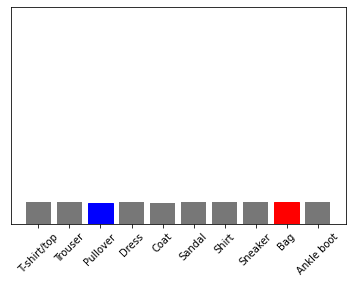

8

In [145]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

# Add the image to a batch where it's the only member.
# tf.keras models are optimized to make predictions on a batch, 
# or collection, of examples at once. 
# Accordingly, even though you're using a single image, you need to add it to a list
img = (np.expand_dims(img,0))

print(img.shape)

# Now predict the correct label for this image
predictions_single = probability_model.predict(img)

print(predictions_single)

#refer to the the plot_value_array function above
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

# tf.keras.Model.predict returns a list of lists — one list for each image in the batch of data. 
# Grab the predictions for our (only) image in the batch
np.argmax(predictions_single[0])

# And the model predicts a label as expected.


# **Upload this Day 2 Colab Notebook to your Github repository under "Day 2" folder. Also add your *Reflection* on today's learning in README.md**